# 1. Relative Strength Index (RSI)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = pd.read_csv("datasets/eurusd.csv", parse_dates=["Date"], index_col="Date")
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


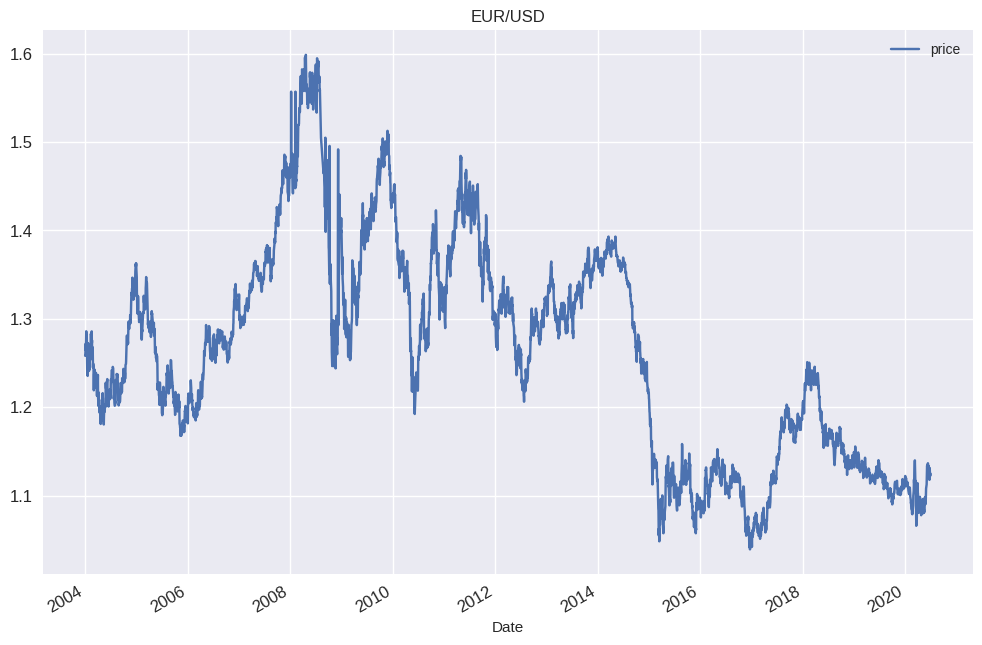

In [4]:
data.plot(figsize=(12, 8), title="EUR/USD", fontsize=12)
plt.show()

## 1-1. Relative Strength Index (RSI) with pandas

In [5]:
data.price.diff()

Date
2004-01-01         NaN
2004-01-02    0.000000
2004-01-05    0.010504
2004-01-06    0.003405
2004-01-07   -0.008008
                ...   
2020-06-24    0.003267
2020-06-25   -0.006147
2020-06-26   -0.002879
2020-06-29    0.000378
2020-06-30    0.002134
Name: price, Length: 4275, dtype: float64

In [6]:
data["U"] = np.where(data.price.diff() > 0, data.price.diff(), 0)
data["D"] = np.where(data.price.diff() < 0, -data.price.diff(), 0)
data

,price,U,D
Date,,,
2004-01-01,1.258194,0.000000,0.000000
2004-01-02,1.258194,0.000000,0.000000
2004-01-05,1.268698,0.010504,0.000000
2004-01-06,1.272103,0.003405,0.000000
2004-01-07,1.264095,0.000000,0.008008
...,...,...,...
2020-06-24,1.131235,0.003267,0.000000
2020-06-25,1.125087,0.000000,0.006147
2020-06-26,1.122208,0.000000,0.002879


In [7]:
periods = 20

data["MA_U"] = data.U.rolling(periods).mean()
data["MA_D"] = data.D.rolling(periods).mean()
data

,price,U,D,MA_U,MA_D
Date,,,,,
2004-01-01,1.258194,0.000000,0.000000,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,NaN,NaN
2004-01-05,1.268698,0.010504,0.000000,NaN,NaN
2004-01-06,1.272103,0.003405,0.000000,NaN,NaN
2004-01-07,1.264095,0.000000,0.008008,NaN,NaN
...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981


In [8]:
data["RSI"] = data.MA_U / (data.MA_U + data.MA_D) * 100
data

,price,U,D,MA_U,MA_D,RSI
Date,,,,,,
2004-01-01,1.258194,0.000000,0.000000,NaN,NaN,NaN
2004-01-02,1.258194,0.000000,0.000000,NaN,NaN,NaN
2004-01-05,1.268698,0.010504,0.000000,NaN,NaN,NaN
2004-01-06,1.272103,0.003405,0.000000,NaN,NaN,NaN
2004-01-07,1.264095,0.000000,0.008008,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190


In [9]:
data.dropna(inplace=True)
data

,price,U,D,MA_U,MA_D,RSI
Date,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086
...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190


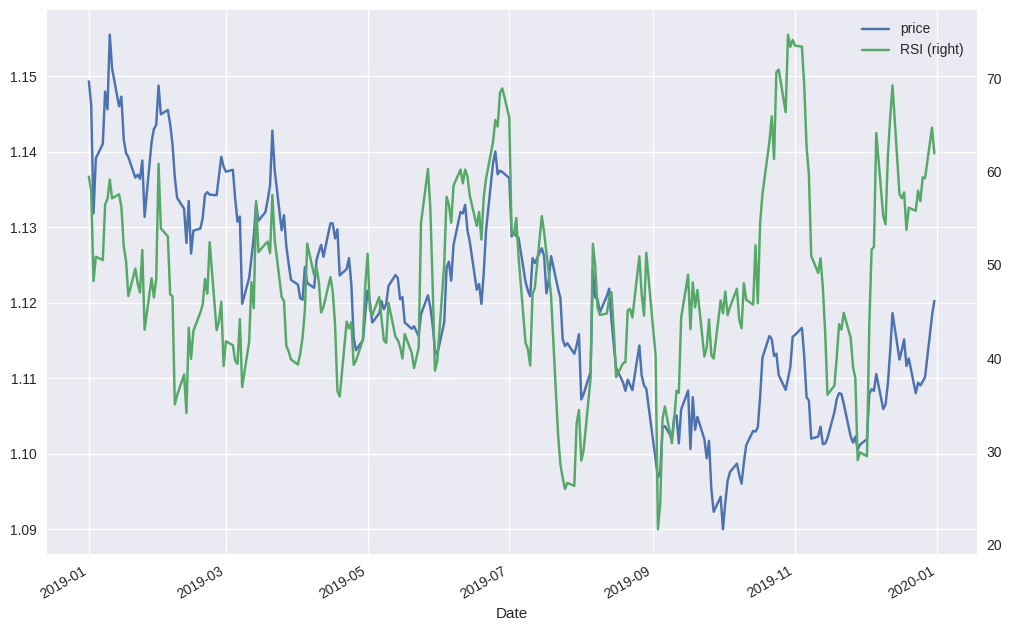

In [10]:
data.loc["2019", ["price", "RSI"]].plot(figsize=(12, 8), secondary_y="RSI")
plt.show()

## 1-2. Mean Reversion Strategy with Relative Strength Index (RSI)

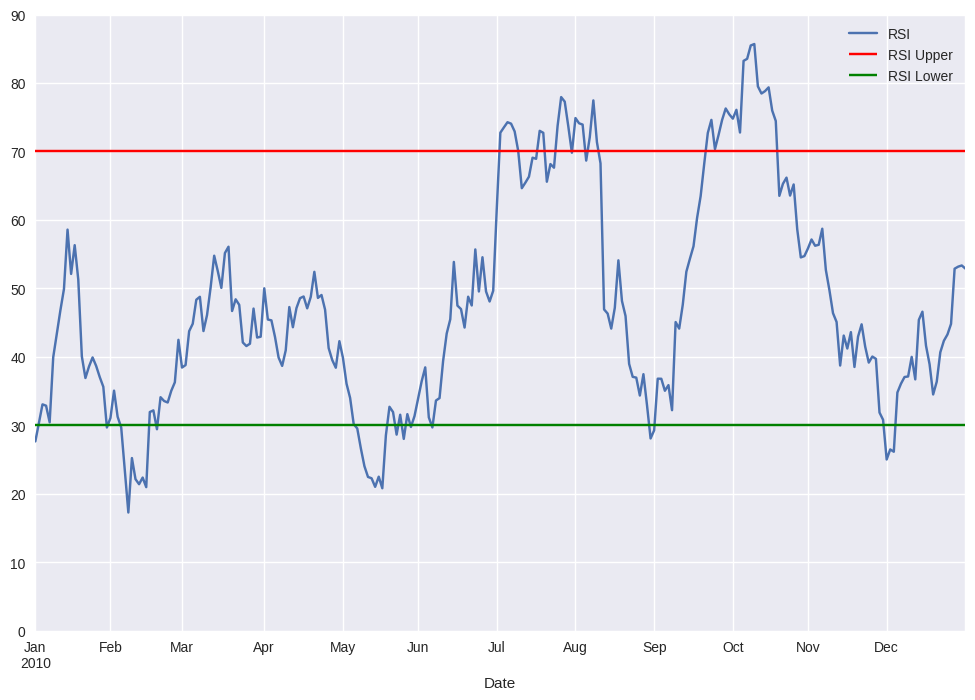

In [11]:
rsi_upper = 70
rsi_lower = 30

data.loc["2010", ["RSI"]].plot(figsize=(12, 8))
plt.hlines(y=rsi_upper, xmin=data.index[0], xmax=data.index[-1], label="RSI Upper", color = "r")
plt.hlines(y=rsi_lower, xmin=data.index[0], xmax=data.index[-1], label="RSI Lower", color = "g")
plt.yticks(ticks = range(0, 100, 10))
plt.legend()
plt.show()

In [12]:
# If overbought then go short
data["position"] = np.where(data.RSI > rsi_upper, -1, np.nan)

# If oversold then go long
data["position"] = np.where(data.RSI < rsi_lower, 1, data.position)

# Neither overbought nor oversold then neutral
data.position = data.position.fillna(0)
data

,price,U,D,MA_U,MA_D,RSI,position
Date,,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973,0.0
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0
...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0


In [13]:
data.position.value_counts()

position
 0.0    3637
-1.0     316
 1.0     303
Name: count, dtype: int64

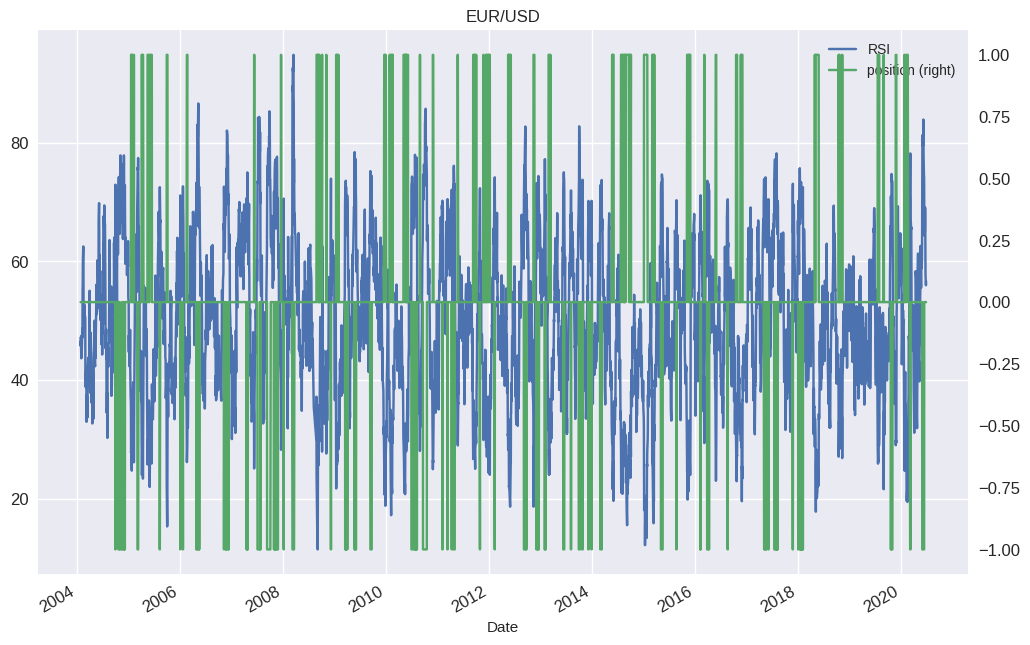

In [14]:
data.loc[:, ["RSI", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y="position", title="EUR/USD")
plt.show()

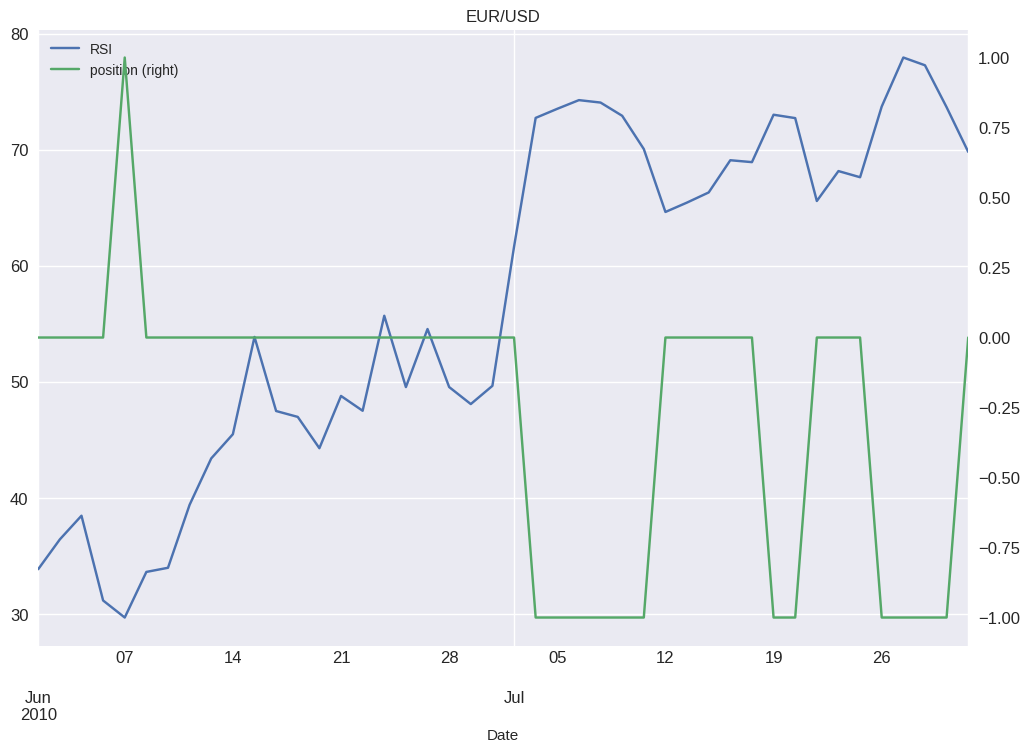

In [15]:
data.loc["06-2010":"07-2010", ["RSI", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y="position", title="EUR/USD")
plt.show()

In [16]:
# Vectorized strategy backtesting
data["returns"] = np.log(data.price.div(data.price.shift(1)))
data

,price,U,D,MA_U,MA_D,RSI,position,returns
Date,,,,,,,,
2004-01-28,1.244199,0.000000,0.019496,0.004610,0.005310,46.472973,0.0,NaN
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.002572
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562


In [17]:
data.dropna(inplace=True)
data

,price,U,D,MA_U,MA_D,RSI,position,returns
Date,,,,,,,,
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.002572
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562


In [18]:
data["strategy"] = data.position.shift(1) * data["returns"]
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy
Date,,,,,,,,,
2004-01-29,1.241003,0.000000,0.003196,0.004610,0.005470,45.736150,0.0,-0.002572,NaN
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0


In [19]:
data.dropna(inplace=True)
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy
Date,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0


In [20]:
data["trades"] = data.position.diff().fillna(0).abs()
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy,trades
Date,,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0,0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0,0.0
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0,0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0,0.0


In [21]:
data.trades.value_counts()

trades
0.0    3926
1.0     328
Name: count, dtype: int64

In [22]:
ptc = 0.00007
data["strategy_net"] = data.strategy - data.trades * ptc
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy,trades,strategy_net
Date,,,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0,0.0,0.0
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0,0.0,-0.0
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0,0.0,0.0
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0,0.0,0.0
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0,0.0,0.0
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0,0.0,-0.0
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0,0.0,-0.0


In [23]:
data["cum_returns"] = data["returns"].cumsum().apply(np.exp)
data["cum_strategy"] = data["strategy"].cumsum().apply(np.exp)
data["cum_strategy_net"] = data["strategy_net"].cumsum().apply(np.exp)
data

,price,U,D,MA_U,MA_D,RSI,position,returns,strategy,trades,strategy_net,cum_returns,cum_strategy,cum_strategy_net
Date,,,,,,,,,,,,,,
2004-01-30,1.246805,0.005802,0.000000,0.004900,0.005470,47.254310,0.0,0.004665,0.0,0.0,0.0,1.004676,1.000000,1.000000
2004-02-02,1.243302,0.000000,0.003503,0.004375,0.005645,43.663573,0.0,-0.002814,-0.0,0.0,-0.0,1.001852,1.000000,1.000000
2004-02-03,1.253494,0.010192,0.000000,0.004714,0.005645,45.509086,0.0,0.008164,0.0,0.0,0.0,1.010066,1.000000,1.000000
2004-02-04,1.253997,0.000503,0.000000,0.004740,0.005244,47.471521,0.0,0.000401,0.0,0.0,0.0,1.010471,1.000000,1.000000
2004-02-05,1.257197,0.003200,0.000000,0.004229,0.005244,44.642922,0.0,0.002549,0.0,0.0,0.0,1.013050,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.003267,0.000000,0.003182,0.001530,67.538713,0.0,0.002892,0.0,0.0,0.0,0.911549,1.562978,1.527501
2020-06-25,1.125087,0.000000,0.006147,0.003007,0.001837,62.077668,0.0,-0.005449,-0.0,0.0,-0.0,0.906595,1.562978,1.527501
2020-06-26,1.122208,0.000000,0.002879,0.002696,0.001981,57.643190,0.0,-0.002562,-0.0,0.0,-0.0,0.904276,1.562978,1.527501


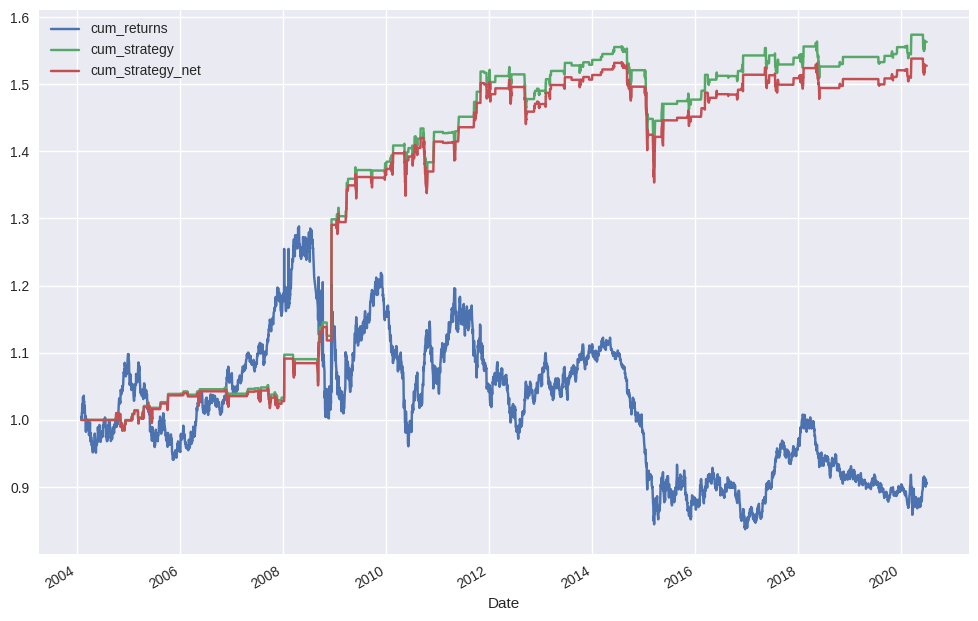

In [24]:
data[["cum_returns", "cum_strategy", "cum_strategy_net"]].plot(figsize=(12 , 8))
plt.show()

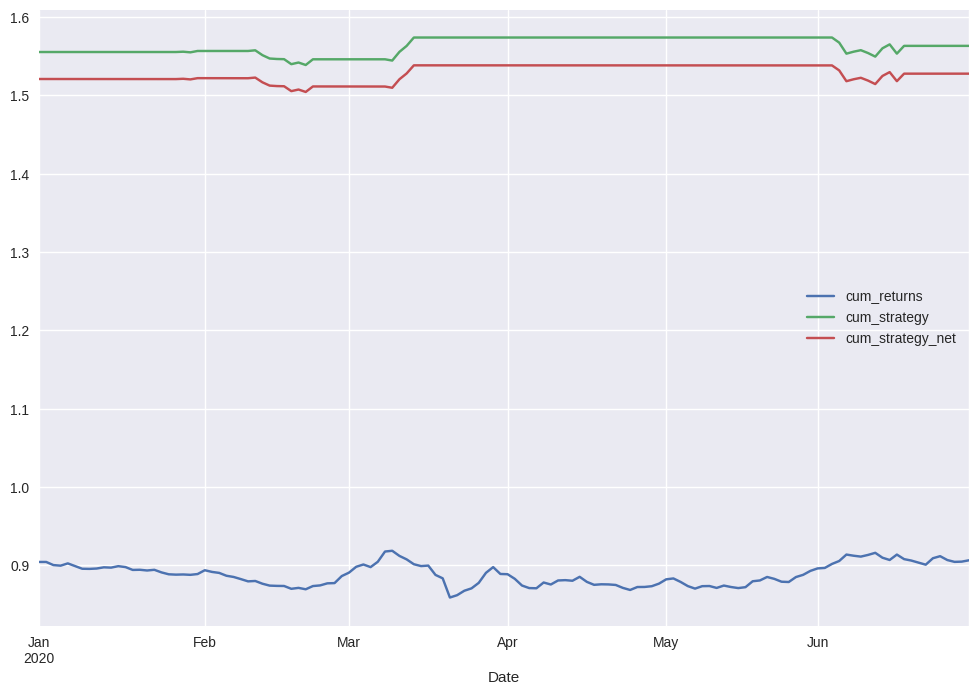

In [25]:
data.loc["2020", ["cum_returns", "cum_strategy", "cum_strategy_net"]].plot(figsize=(12, 8))
plt.show()

# 2. Stochastic Oscillator
## 2-1. Stochastic Oscillator with pandas

In [26]:
data = pd.read_csv("datasets/eurusd_ohlc.csv", parse_dates=[0], index_col=0)
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3811 entries, 2008-01-01 to 2020-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3811 non-null   float64
 1   High    3811 non-null   float64
 2   Low     3811 non-null   float64
 3   Close   3811 non-null   float64
dtypes: float64(4)
memory usage: 148.9 KB


In [37]:
data = data.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close"})
data

,open,high,low,close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


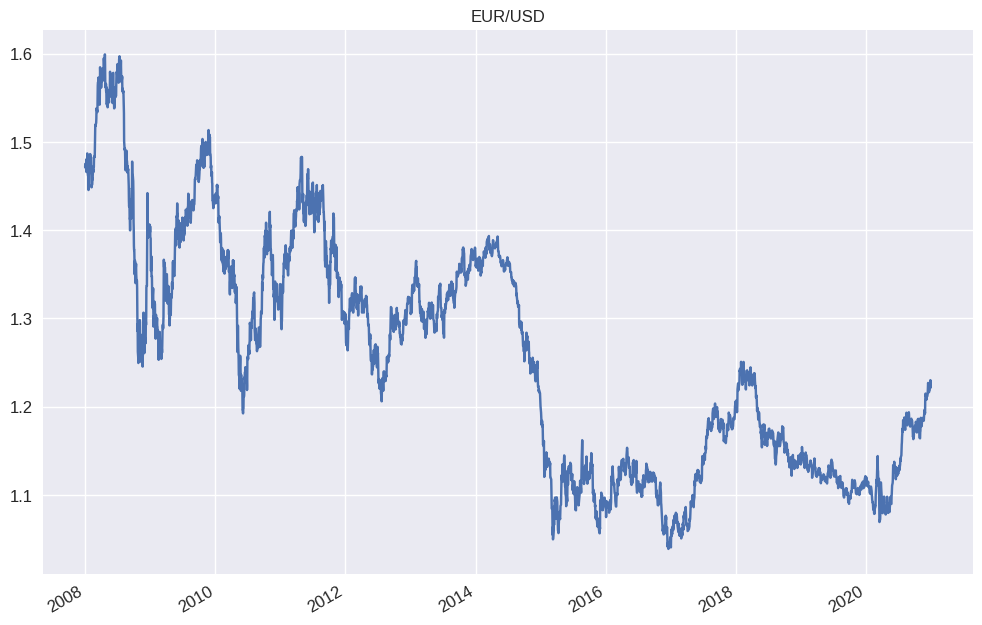

In [38]:
data.close.plot(figsize=(12, 8), title="EUR/USD", fontsize=12)
plt.show()

In [39]:
periods = 14
data["roll_low"] = data.low.rolling(periods).min()
data["roll_high"] = data.high.rolling(periods).max()
data

,open,high,low,close,roll_low,roll_high
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN
...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102


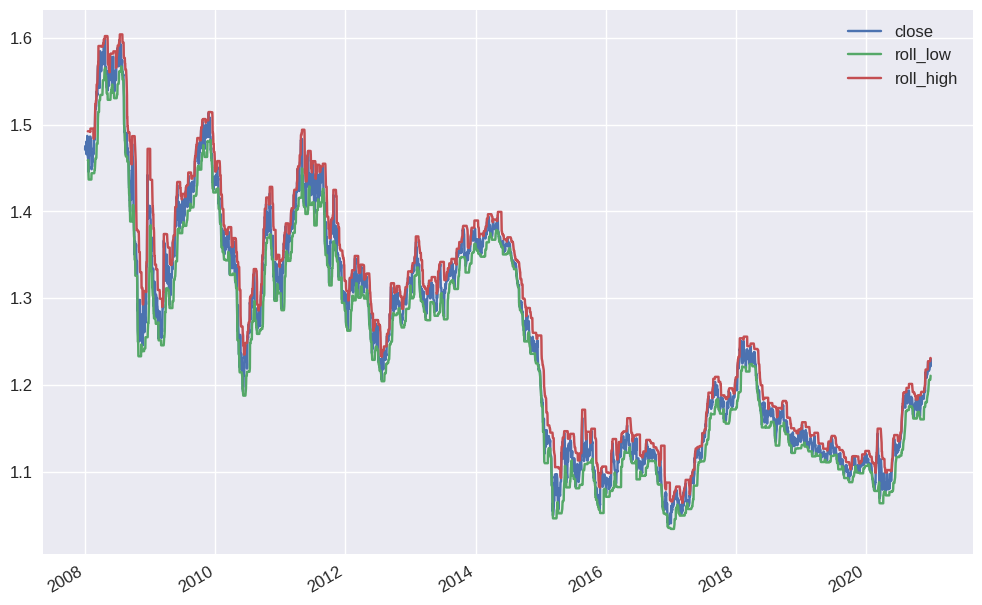

In [40]:
data.loc[:, ["close", "roll_low", "roll_high"]].plot(figsize=(12, 8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

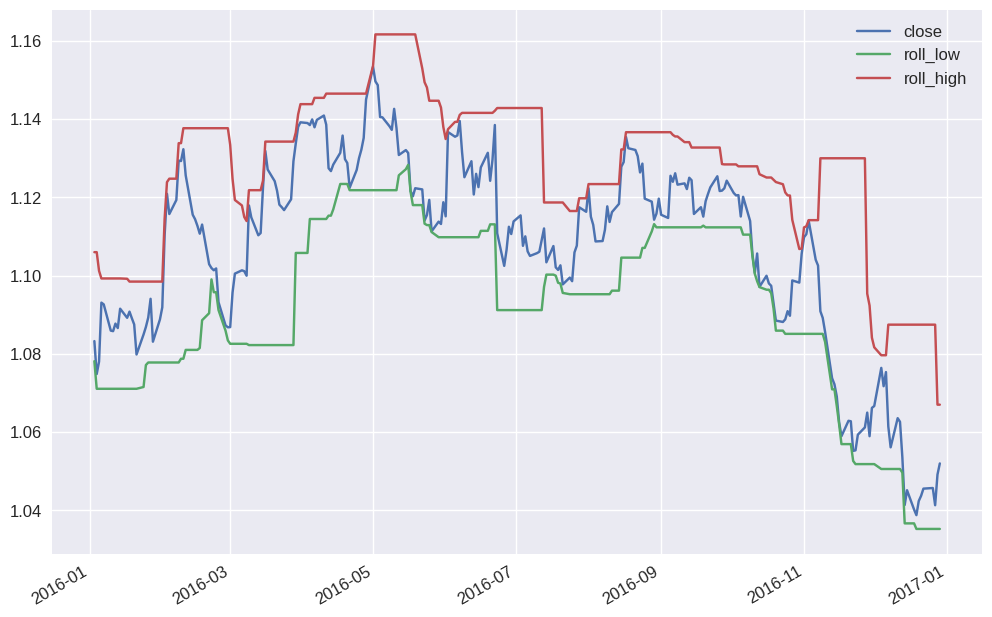

In [41]:
data.loc["2016", ["close", "roll_low", "roll_high"]].plot(figsize=(12, 8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [42]:
data["K"] = (data["close"] - data["roll_low"]) / (data["roll_high"] - data["roll_low"]) * 100
data

,open,high,low,close,roll_low,roll_high,K
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN,NaN
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN,NaN
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN,NaN
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN,NaN
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877


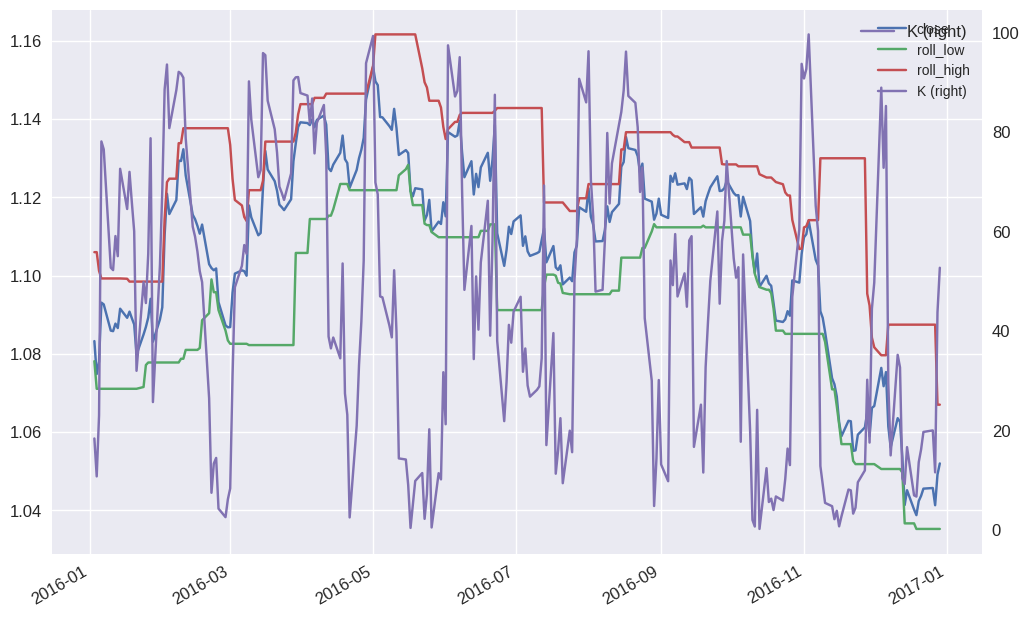

In [43]:
data.loc["2016", ["close", "roll_low", "roll_high", "K"]].plot(figsize=(12, 8), fontsize=12, secondary_y="K")
plt.legend(fontsize=12)
plt.show()

In [44]:
window = 3

data["D"] = data.K.rolling(window).mean()
data

,open,high,low,close,roll_low,roll_high,K,D
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN,NaN,NaN
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN,NaN,NaN
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN,NaN,NaN
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN,NaN,NaN
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103


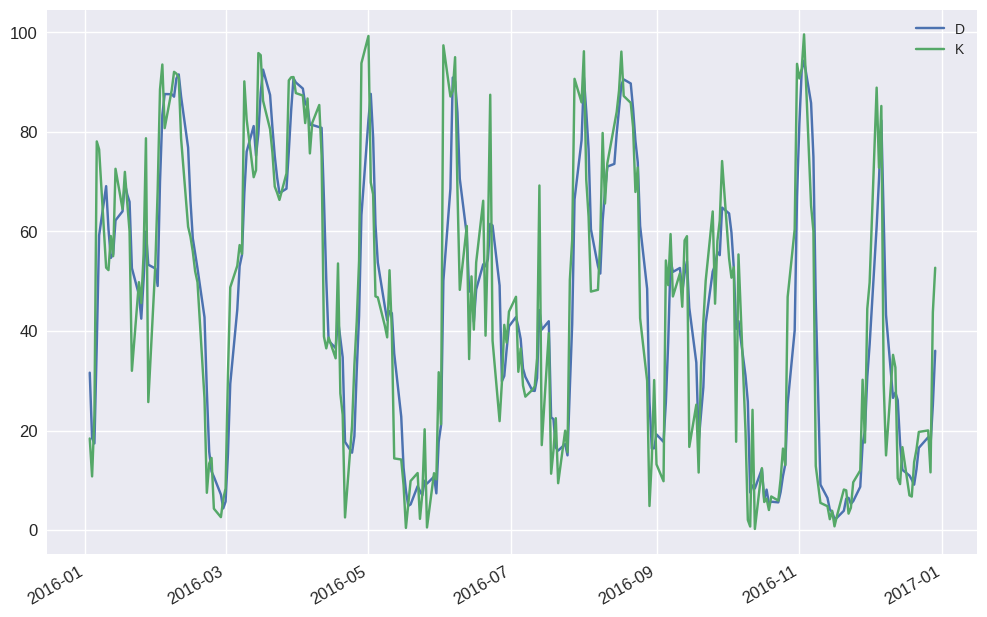

In [45]:
data.loc["2016", ["D", "K"]].plot(figsize=(12, 8), fontsize=12)
plt.show()

## 2-2. Momentum Strategy with Stochastic Oscillator

In [46]:
data["position"] = np.where(data["K"] > data["D"], 1, -1)
data

,open,high,low,close,roll_low,roll_high,K,D,position
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN,NaN,NaN,-1
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN,NaN,NaN,-1
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN,NaN,NaN,-1
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN,NaN,NaN,-1
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1


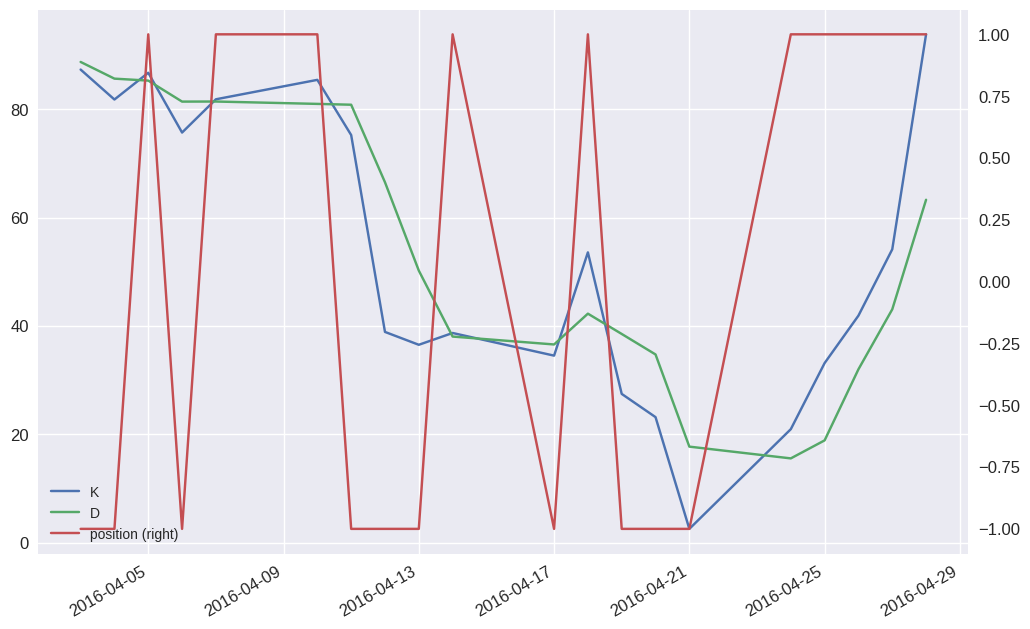

In [47]:
data.loc["04-2016", ["K", "D", "position"]].plot(figsize=(12, 8), fontsize=12, secondary_y="position")
plt.show()

In [48]:
# Vectorized strategy backtesting
data["returns"] = np.log(data.close.div(data.close.shift(1)))
data

,open,high,low,close,roll_low,roll_high,K,D,position,returns
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN,NaN,NaN,-1,NaN
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN,NaN,NaN,-1,0.002471
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN,NaN,NaN,-1,-0.000549
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN,NaN,NaN,-1,0.000244
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN,NaN,NaN,-1,-0.003471
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1,-0.000057
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1,0.002484
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1,0.002861
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1,0.004057


In [49]:
data.dropna(inplace=True)
data

,open,high,low,close,roll_low,roll_high,K,D,position,returns
2008-01-19,1.46204,1.46204,1.45992,1.46035,1.45896,1.49224,4.176683,9.918178,-1,-0.001211
2008-01-20,1.46040,1.46046,1.44218,1.44544,1.44218,1.49224,6.512185,6.728020,-1,-0.010262
2008-01-21,1.44538,1.46434,1.43664,1.46294,1.43664,1.49224,47.302158,19.330342,1,0.012034
2008-01-22,1.46292,1.46844,1.45114,1.46304,1.43664,1.49224,47.482014,33.765453,1,0.000068
2008-01-23,1.46298,1.47794,1.45912,1.47556,1.43664,1.49224,70.000000,54.928058,1,0.008521
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1,-0.000057
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1,0.002484
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1,0.002861
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1,0.004057


In [50]:
data["strategy"] = data.position.shift(1) * data["returns"]
data

,open,high,low,close,roll_low,roll_high,K,D,position,returns,strategy
2008-01-19,1.46204,1.46204,1.45992,1.46035,1.45896,1.49224,4.176683,9.918178,-1,-0.001211,NaN
2008-01-20,1.46040,1.46046,1.44218,1.44544,1.44218,1.49224,6.512185,6.728020,-1,-0.010262,0.010262
2008-01-21,1.44538,1.46434,1.43664,1.46294,1.43664,1.49224,47.302158,19.330342,1,0.012034,-0.012034
2008-01-22,1.46292,1.46844,1.45114,1.46304,1.43664,1.49224,47.482014,33.765453,1,0.000068,0.000068
2008-01-23,1.46298,1.47794,1.45912,1.47556,1.43664,1.49224,70.000000,54.928058,1,0.008521,0.008521
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1,-0.000057,0.000057
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1,0.002484,0.002484
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1,0.002861,0.002861
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1,0.004057,0.004057


In [51]:
data.dropna(inplace=True)
data

,open,high,low,close,roll_low,roll_high,K,D,position,returns,strategy
2008-01-20,1.46040,1.46046,1.44218,1.44544,1.44218,1.49224,6.512185,6.728020,-1,-0.010262,0.010262
2008-01-21,1.44538,1.46434,1.43664,1.46294,1.43664,1.49224,47.302158,19.330342,1,0.012034,-0.012034
2008-01-22,1.46292,1.46844,1.45114,1.46304,1.43664,1.49224,47.482014,33.765453,1,0.000068,0.000068
2008-01-23,1.46298,1.47794,1.45912,1.47556,1.43664,1.49224,70.000000,54.928058,1,0.008521,0.008521
2008-01-24,1.47546,1.47778,1.46610,1.46813,1.43664,1.49224,56.636691,58.039568,-1,-0.005048,-0.005048
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1,-0.000057,0.000057
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1,0.002484,0.002484
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1,0.002861,0.002861
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1,0.004057,0.004057


In [52]:
data["trades"] = data.position.diff().fillna(0).abs()
data

,open,high,low,close,roll_low,roll_high,K,D,position,returns,strategy,trades
2008-01-20,1.46040,1.46046,1.44218,1.44544,1.44218,1.49224,6.512185,6.728020,-1,-0.010262,0.010262,0.0
2008-01-21,1.44538,1.46434,1.43664,1.46294,1.43664,1.49224,47.302158,19.330342,1,0.012034,-0.012034,2.0
2008-01-22,1.46292,1.46844,1.45114,1.46304,1.43664,1.49224,47.482014,33.765453,1,0.000068,0.000068,0.0
2008-01-23,1.46298,1.47794,1.45912,1.47556,1.43664,1.49224,70.000000,54.928058,1,0.008521,0.008521,0.0
2008-01-24,1.47546,1.47778,1.46610,1.46813,1.43664,1.49224,56.636691,58.039568,-1,-0.005048,-0.005048,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1,-0.000057,0.000057,2.0
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1,0.002484,0.002484,0.0
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1,0.002861,0.002861,0.0
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1,0.004057,0.004057,0.0


In [53]:
data.trades.value_counts()

trades
0.0    2287
2.0    1508
Name: count, dtype: int64

In [54]:
ptc = 0.00007
data["strategy_net"] = data.strategy - data.trades * ptc
data

,open,high,low,close,roll_low,roll_high,K,D,position,returns,strategy,trades,strategy_net
2008-01-20,1.46040,1.46046,1.44218,1.44544,1.44218,1.49224,6.512185,6.728020,-1,-0.010262,0.010262,0.0,0.010262
2008-01-21,1.44538,1.46434,1.43664,1.46294,1.43664,1.49224,47.302158,19.330342,1,0.012034,-0.012034,2.0,-0.012174
2008-01-22,1.46292,1.46844,1.45114,1.46304,1.43664,1.49224,47.482014,33.765453,1,0.000068,0.000068,0.0,0.000068
2008-01-23,1.46298,1.47794,1.45912,1.47556,1.43664,1.49224,70.000000,54.928058,1,0.008521,0.008521,0.0,0.008521
2008-01-24,1.47546,1.47778,1.46610,1.46813,1.43664,1.49224,56.636691,58.039568,-1,-0.005048,-0.005048,2.0,-0.005188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1,-0.000057,0.000057,2.0,-0.000083
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1,0.002484,0.002484,0.0,0.002484
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1,0.002861,0.002861,0.0,0.002861
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1,0.004057,0.004057,0.0,0.004057


In [55]:
data["cum_returns"] = data["returns"].cumsum().apply(np.exp)
data["cum_strategy"] = data["strategy"].cumsum().apply(np.exp)
data["cum_strategy_net"] = data["strategy_net"].cumsum().apply(np.exp)
data

,open,high,low,close,roll_low,roll_high,K,D,position,returns,strategy,trades,strategy_net,cum_returns,cum_strategy,cum_strategy_net
2008-01-20,1.46040,1.46046,1.44218,1.44544,1.44218,1.49224,6.512185,6.728020,-1,-0.010262,0.010262,0.0,0.010262,0.989790,1.010315,1.010315
2008-01-21,1.44538,1.46434,1.43664,1.46294,1.43664,1.49224,47.302158,19.330342,1,0.012034,-0.012034,2.0,-0.012174,1.001774,0.998230,0.998090
2008-01-22,1.46292,1.46844,1.45114,1.46304,1.43664,1.49224,47.482014,33.765453,1,0.000068,0.000068,0.0,0.000068,1.001842,0.998298,0.998158
2008-01-23,1.46298,1.47794,1.45912,1.47556,1.43664,1.49224,70.000000,54.928058,1,0.008521,0.008521,0.0,0.008521,1.010415,1.006841,1.006700
2008-01-24,1.47546,1.47778,1.46610,1.46813,1.43664,1.49224,56.636691,58.039568,-1,-0.005048,-0.005048,2.0,-0.005188,1.005327,1.001771,1.001491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1,-0.000057,0.000057,2.0,-0.000083,0.834382,1.349162,1.092538
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1,0.002484,0.002484,0.0,0.002484,0.836457,1.352517,1.095255
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1,0.002861,0.002861,0.0,0.002861,0.838854,1.356392,1.098393
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1,0.004057,0.004057,0.0,0.004057,0.842264,1.361906,1.102859


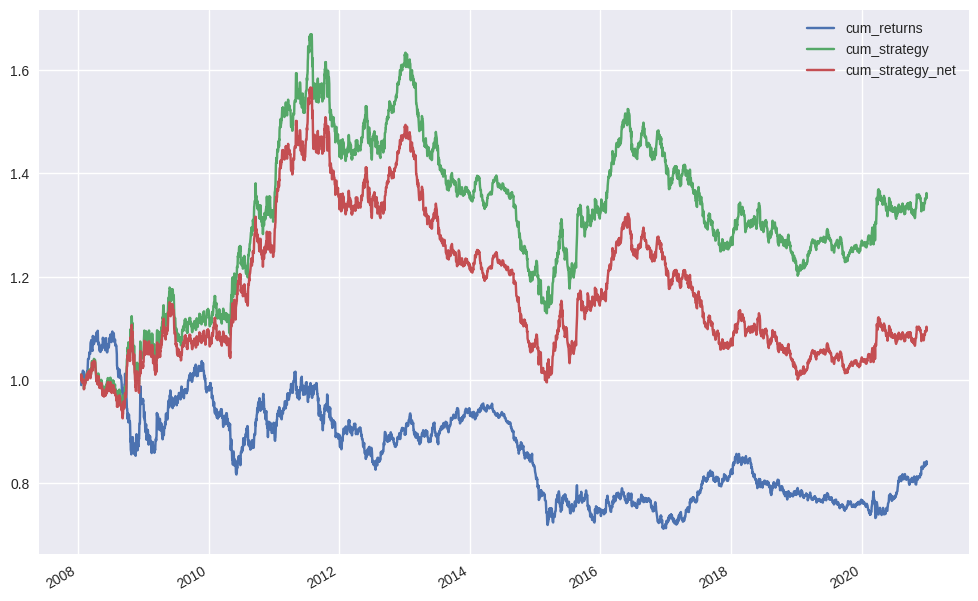

In [56]:
data[["cum_returns", "cum_strategy", "cum_strategy_net"]].plot(figsize=(12, 8))
plt.show()

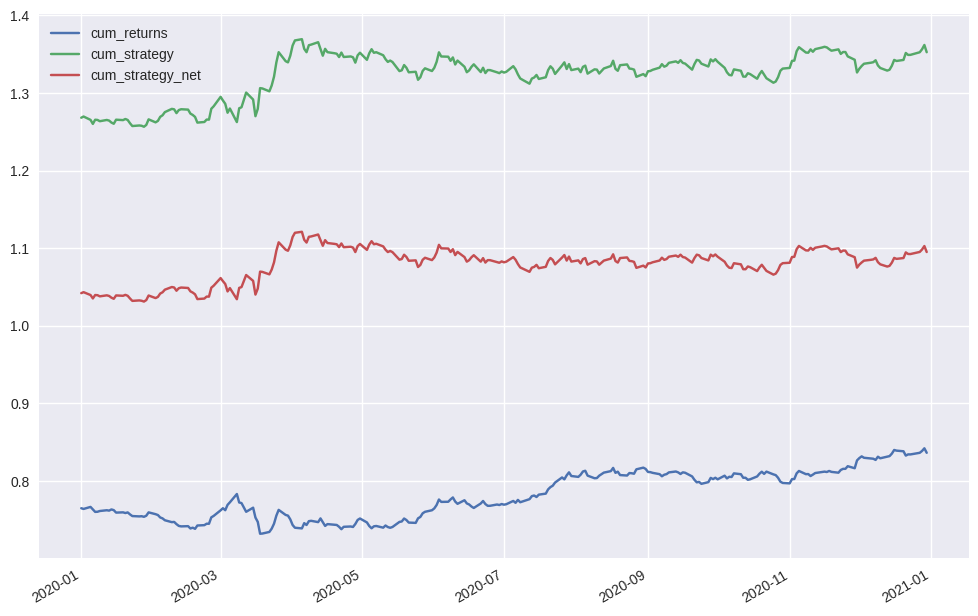

In [57]:
data.loc["2020", ["cum_returns", "cum_strategy", "cum_strategy_net"]].plot(figsize=(12, 8))
plt.show()